In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd
from src.factories import WheatData, WheatDataset
from src.factories import get_data, get_wheat_dataset, get_transforms
from src.visualize import imshow_with_bboxes

In [2]:
INPUT_DIR = "./../input/global-wheat-detection"

data: WheatData = get_data(INPUT_DIR)

transforms = get_transforms()
train_image_ids, train_df, val_image_ids, val_df = data.get_fold(0)
train_ds = get_wheat_dataset(
    INPUT_DIR, train_image_ids, train_df, "train", transforms.get_train_transforms()
)
val_ds = get_wheat_dataset(
    INPUT_DIR, val_image_ids, val_df, "train", transforms.get_valid_transforms()
)

/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/yodaikishimoto/anaconda3/envs/ml/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1469: DeprecationWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn("This class has been deprecated. Please use CoarseDropout", DeprecationWarning)


## Show the same image with different augumentation 5 times

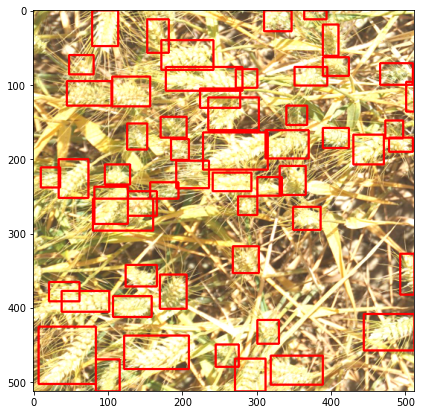

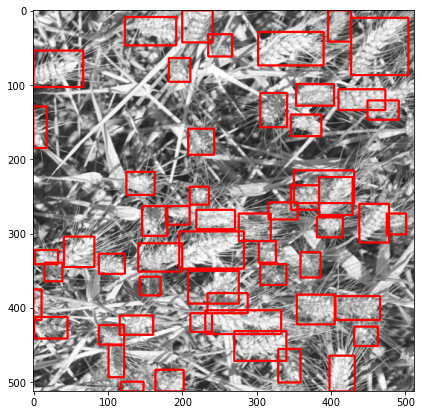

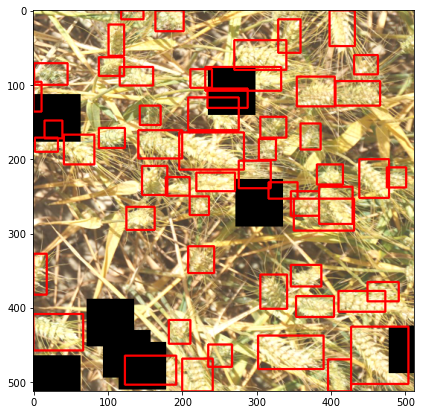

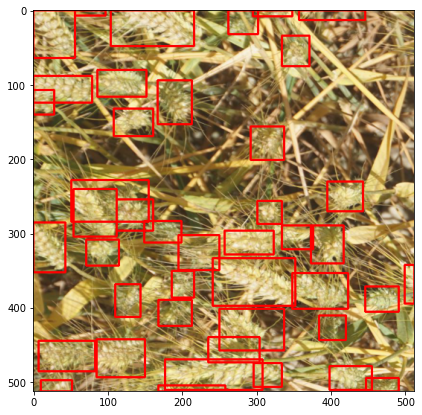

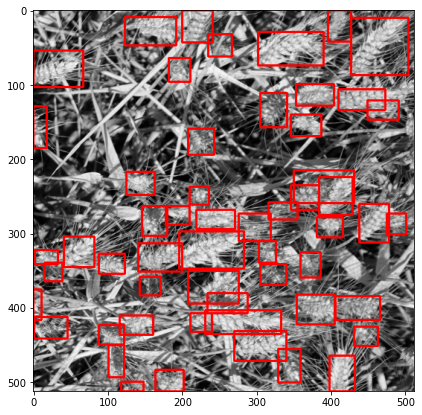

In [3]:
for i in range(5):
    img, target, image_id = train_ds[0]
    imshow_with_bboxes(img, target["bboxes"], bbox_type="yxyx")